In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF
import math

### подготовка


In [2]:
n = 25
selection = np.random.exponential(scale=1, size=n)
bootstrap_ammount = 100000
k_BOOT = math.ceil(1 + math.log2(bootstrap_ammount))
k = math.ceil(1 + math.log2(n))


## Пункт А
Определить по выборке:
- моду
- медиану
- размах
- оценку коэффициента асимметрии

In [3]:

MODE = selection[np.argmax(np.bincount(selection.astype(int)))]
print(f"мода: {MODE:.2f}")

MEDIAN = np.median(selection)
print(f"медиана: {MEDIAN:.2f}")

SPREAD = np.ptp(selection)  # l
print(f"размах: {SPREAD:.2f}")

SKEW = skew(selection)
print(f"оценка коэфициента ассиметрии: {SKEW:.2f}")

мода: 0.09
медиана: 0.96
размах: 3.08
оценка коэфициента ассиметрии: 0.73


## Пункт B
Построить:
- эмпирическую функцию распределения
- гистограмму
- boxplot

Text(0.5, 1.0, 'Эмпирическая функция распределения')

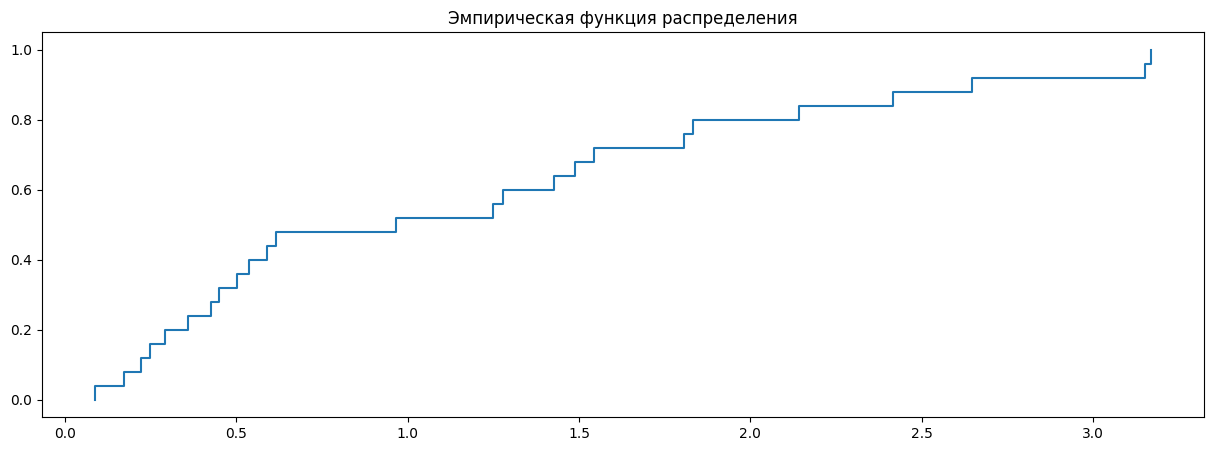

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 1, 1)
empirical_distribution = ECDF(selection)
plt.step(empirical_distribution.x, empirical_distribution.y, where="post")
plt.title("Эмпирическая функция распределения")

Text(0.5, 1.0, 'гистограмма')

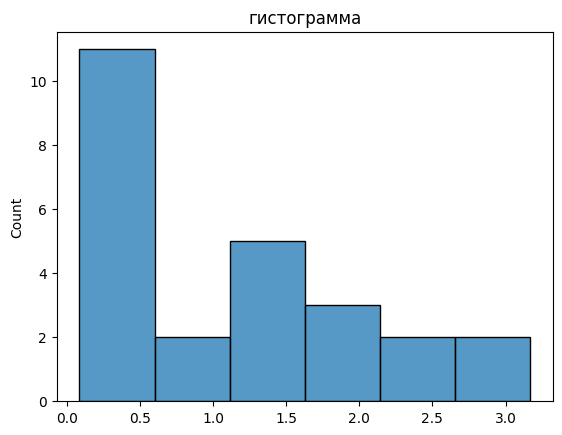

In [5]:
plt.subplot(1, 1, 1)
sns.histplot(selection, bins=math.ceil(k), kde=False)
plt.title("гистограмма")

Text(0.5, 1.0, 'усики')

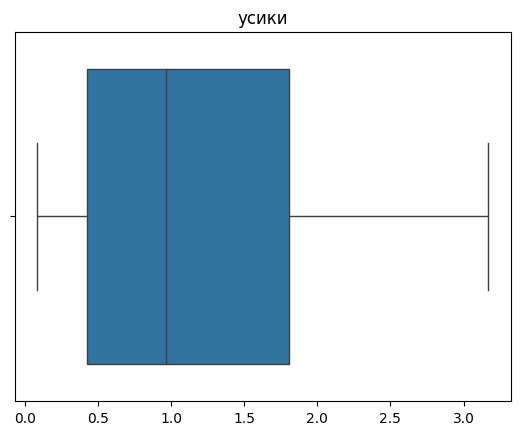

In [6]:
# Boxplot

plt.subplot(1, 1, 1)
sns.boxplot(x=selection)
plt.title("усики")

## Пункт C

Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

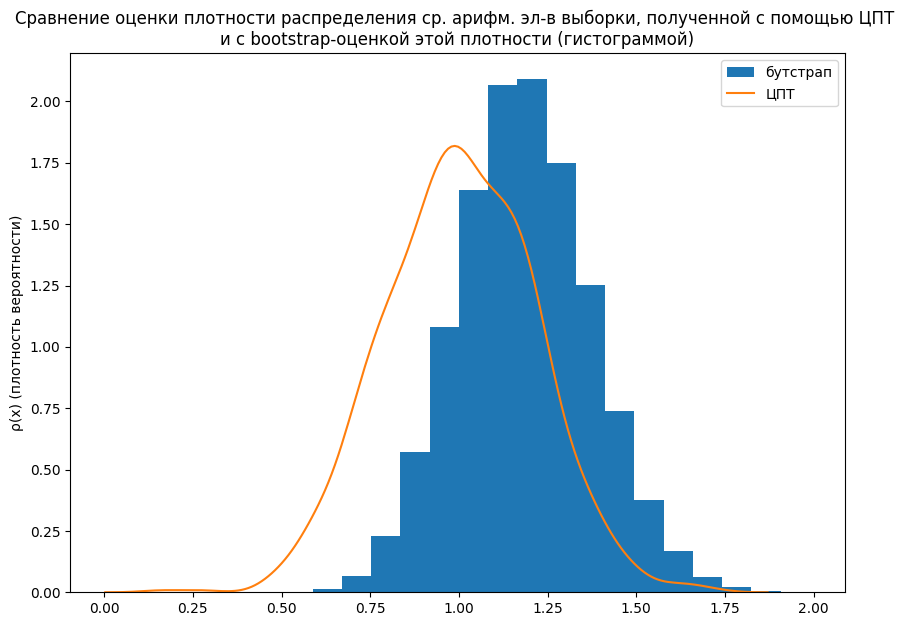

In [7]:
_, axs = plt.subplots(1, 1, figsize=(10, 7))
bootstrap_means = [np.mean(np.random.choice(selection, size=n, replace=True)) for _ in range(bootstrap_ammount)]

axs.set_ylabel("ρ(x) (плотность вероятности)")
axs.set_title("Сравнение оценки плотности распределения ср. арифм. эл-в выборки, полученной с помощью ЦПТ \nи с bootstrap-оценкой этой плотности (гистограммой)")

axs.hist(bootstrap_means,
          bins=k_BOOT,
          density=True, label="бутстрап")
# 1/5 - сигма, с.м. приложение к файлу да
sns.kdeplot(np.random.normal(1, 1/5, size=1000), label="ЦПТ")
plt.legend()
plt.show()

## Пункт D
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициента асимметрии будет меньше 1


	P(к/ф асеметрии бутстрапа < 1): 0.82



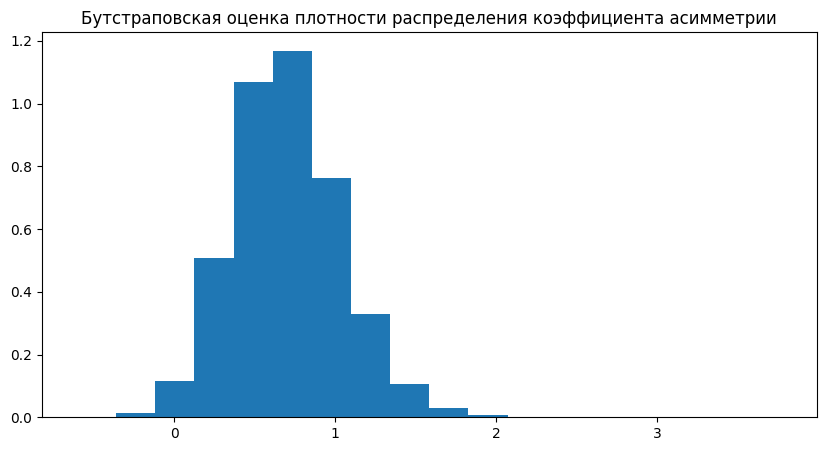

In [8]:
bootstrap_skew_data = [skew(np.random.choice(selection, size=n, replace=True)) for _ in range(bootstrap_ammount)]
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_skew_data,
          bins=k_BOOT,
          density=True, label="плотность(х)")
plt.title('Бутстраповская оценка плотности распределения коэффициента асимметрии')

probability = np.mean(np.array(bootstrap_skew_data) < 1)
print(f"\n\tP(к/ф асеметрии бутстрапа < 1): {probability:.2f}\n")

plt.show()

## Пункт E
Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

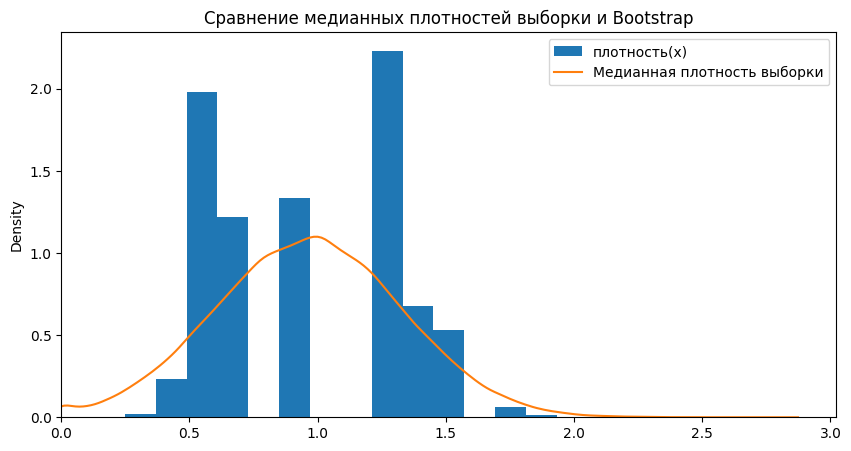

In [9]:
bootstrap_medians = [np.median(np.random.choice(selection, size=n, replace=True)) for _ in range(bootstrap_ammount)]
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_medians,
          bins=k_BOOT,
          density=True, label="плотность(х)")

tmp = np.random.normal(MEDIAN, np.std(bootstrap_medians), size=bootstrap_ammount)
tmp[tmp < 0] = 0
sns.kdeplot(tmp, label="Медианная плотность выборки")
plt.legend()
plt.title("Сравнение медианных плотностей выборки и Bootstrap")
plt.xlim(xmin=0)
plt.show()